**【問題1】コンペティション内容の確認**<br>
* 何を学習し、何を予測するのか<br>
電話会社や取引情報などのさまざまな代替データを学習し、クライアントの返済能力を予測します。<br>
* どのようなファイルを作りKaggleに提出するか<br>
提出ファイル
SK_ID_CURR テストセットのそれぞれについて、TARGET変数の確率を予測する必要があります。ファイルにはヘッダーが含まれ、次の形式である必要があります。
* 提出されたものはどういった指標値で評価されるのか<br>
提出物は 、予測された確率と観察されたターゲットの間のROC曲線の下の領域で評価されます。

**【問題2】学習と検証**
データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行

In [1]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
import pandas as pd

print("")
print("pd.read_csv()を使用して、変数に格納")
print("")
train = pd.read_csv('train.csv')


pd.read_csv()を使用して、変数に格納



In [3]:
#データフレームの列（columns　axis＝1のこと）を隠さず全て表示 pd.set_option("display.max_columns", None)
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


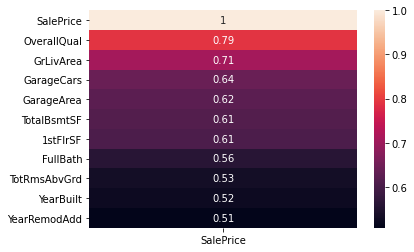

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [6]:
import seaborn as sns, numpy as np
import matplotlib.pyplot as plt

train_corr_ten = train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False).head(11)
sns.heatmap(train_corr_ten, annot=True)
plt.show()
train_corr_ten

In [20]:
X_train = train[['GrLivArea','GarageCars']]
X_train

,GrLivArea,GarageCars
0,1710,2
1,1262,2
2,1786,2
3,1717,3
4,2198,3
...,...,...
1455,1647,2
1456,2073,2
1457,2340,1
1458,1078,1


In [22]:
y_train = train[['SalePrice']]
y_train

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125
